# Closeness with the Dot Product

### Introduction

Now that we saw how the dot product uses the cosine, we'll see in this lesson how we can use the dot product to find the angle between two vectors.  An important application for this, is finding the similarity between two document vectors.  Search engines can use this to see how similar a web page is to a user's query.  

Or, this can be used to group customer complaints, or questions, together.  Both tasks ask the same question.  That is, how similar is one document to another document?  Let's explore how the dot product can help us answer these questions in this lesson.

### Documents as vectors

Now it remember that with when we represent our documents in a matrix, we represent each documents as a vector of it's words.  Imagine that our entire corpus consists of only three different words: body, speed, and price, and that we have the following documents.

* $d_1 =$ body, body, speed, speed
* $d_2 =$ body, speed, speed
* $d_3 =$ price, price, price

These words can translate into the following vectors: 

In [2]:
import numpy as np
d1 = np.array([2, 2, 0])
d2 = np.array([1, 2, 0])
d3 = np.array([0, 0, 3])

And we can plot them with the following: 

In [3]:
X = np.stack([d1, d2, d3])
X

array([[2, 2, 0],
       [1, 2, 0],
       [0, 0, 3]])

In [36]:
def vector_trace(vector, name = ''):
    x_coord = vector[0]
    y_coord = vector[1]
    z_coord = vector[2]
    return go.Scatter3d(x=[0, x_coord], y=[0, y_coord], z=[0, z_coord], mode='lines+markers', text=name, name = name)

v_1 = vector_trace(d1, name = 'body body speed speed')
v_2 = vector_trace(d2, name = 'body speed speed')
v_3 = vector_trace(d3, name = 'price price price')

In [5]:
# price body speed
d1 = np.array([3, 0, 0])
d2 = np.array([0, 2, 2])
d3 = np.array([0, 1, 2])

In [11]:
np.sqrt(d1.dot(d1))

3.0

In [16]:
from numpy.linalg import norm

(d1/norm(d1)).dot(d2/norm(d2))

(d3/norm(d3)).dot(d2/norm(d2))

0.9486832980505137

In [6]:
d1.dot(d2)

0

In [7]:
3*0 + 0*2 + 0*2

0

In [ ]:
|a| |b| cos \theta

In [9]:
np.sqrt(d1.dot(d1))*np.sqrt(d2.dot(d2))

8.485281374238571

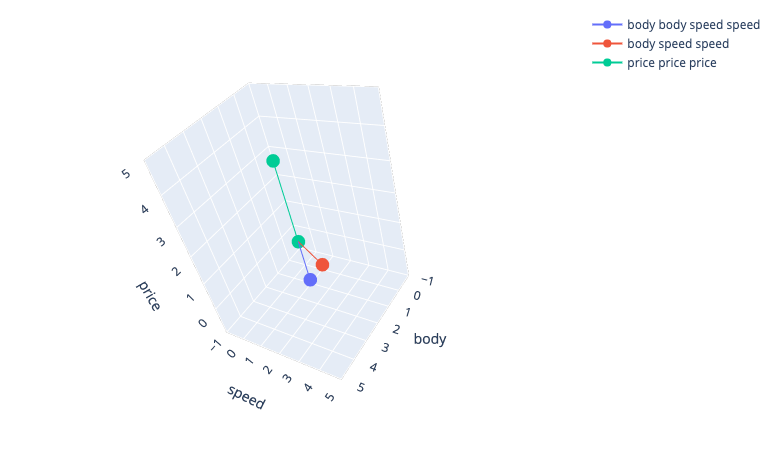

In [39]:
import plotly.graph_objects as go


fig = go.Figure(data=[v_1, v_2, v_3])

fig.update_layout(scene = dict(
                    xaxis_title='body',
                    yaxis_title='speed',
                    zaxis_title='price',
                    xaxis = dict(range=[-1, 5]),
                    yaxis = dict(range=[-1, 5]),
                    zaxis = dict(range=[-1, 5])
),
                    width=700,
                    margin=dict(r=20, b=10, l=10, t=10))
fig.show()

Let's make sure we understand how we got to the figure above.  We assigned each word in our corpus a dimension, and then express each document as a vector in these dimensions. 

Here, we just have the count of the words represent the coordinate in each dimension, as we do with bag of words.  For example, the vector `price price price` just goes in the z axis by three.
However, we could translate this to TF-IDF, which favor dimensions representing rare words, and use term frequency, which calculates word percentage instead of pure count. So instead of thinking of these vectors as a combination of word counts, let's think of it as the *weight* that we assign to each word in the document, where weight captures the importance of the word in a document.

From here, perhaps we can see that the smaller the angle between our two document vectors, the more similar our documents.  Above we can see this that our blue and red vectors are more similar, and they also share words between them.

This is idea of cosine similarity.  We'll calculate the angle between two vectors, and the smaller that angle is, the more similar we say the document is.

And how do we calculate this angle between the two vectors?  Well for that we use the dot product.

### Back to the dot product

So now we have seen that we can represent documents as vectors, let's see a technique to see closeness between vectors.  Remember that the dot product of two vectors $a \cdot b$ is:

$a^T \cdot b = a_db_d = \sum a_ib_i $

Or geometrically, the dot product is: 

$a^T \cdot b = |a||b|cos(\theta)$ 

$\frac{a^T \cdot b}{|a||b|} = cos(\theta)$ 

Which we can think of as the magnitude of the shadow of $a$ cast onto $b$, multiplied by magnitude of $b$.  Note that the length of that shadow, $|a|cos(\theta)$, is a function of the angles between the two vectors.  The more parallel the vectors, the longer the shadow.  And if the vectors are perpendicular then there will be no shadow, and the dot product is zero.  

Now in the context of text, we would only have perpendicular vectors if two documents have no words in common (like the `price, price, price` vector with the other two vectors, above.  And two vectors would be perfectly parallel, if they precisely share the same word importances.

### Cosine Similarity

Now to think about how similar two documents are, we can think of them as the cosine of the angle.  If the cosine of the angle is zero, it means the documents are perpendicular.

In [10]:
import math
import numpy as np

np.round(math.cos(np.pi/2), 2)

0.0

That is, they have no words in common and thus have are not similar.  If the cosine is one, then the two vectors are parallel.  This only occurs if the two documents share precisely the same words, with the same weights.  So the closer the our cosine is to 1, the more similar the documents.

We can use our geometric definition of the dot product to find the cosine between two vectors.

$a^T \cdot b = |a||b|cos(\theta)$ 

Solving for the cosine we get: 

$\frac{a^T}{|a|} \cdot \frac{b}{|b|} = cos(\theta)$ 

So if we would like to find the cosine between two vectors, we normalize the vectors to unit length, and then take the dot product.

Let's try it on our vectors above.  We have the following documents.

`𝑑1=  body, body, speed, speed
𝑑2= body, speed, speed
𝑑3= price, price, price`

Which translates into the following vectors.

In [16]:
d1 = np.array([2, 2, 0])
d2 = np.array([1, 2, 0])
d3 = np.array([0, 0, 3])

In [19]:
from numpy.linalg import norm
d1.dot(d2)/(norm(d1)*norm(d2))

0.9486832980505138

In [20]:
d3.dot(d2)/(norm(d3)*norm(d2))

0.0

So here we can see that the cosine similarity is 0 as the documents d2 and d3 have no words in common.

### Resources

[Cosine Similarity Tutorial](https://janav.wordpress.com/2013/10/27/tf-idf-and-cosine-similarity/)

[cosine similarity](https://www.machinelearningplus.com/nlp/cosine-similarity/)